In [1]:
# importing libraries and Setting Option

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import re

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import MinMaxScaler
#Setting Option
pd.set_option('display.max_columns', 65)
pd.set_option('display.max_rows', 100)

In [2]:
player_data = pd.read_csv('PlayerMarketValue.csv')

In [3]:
player_data.head()

,Name,Age,OVA,POT,Height,Weight,foot,BOV,BP,Growth,Value,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total,Base Stats,IR,PAC,SHO,PAS,DRI,DEF,PHY,Team,Contract
0,Bernardo Silva CAM CM RW,23,86,91,173,64,Left,86,CAM,5,59500000.0,366,85,76,51,85,69.0,412,92,83.0,67,79,91,426,86,78,92.0,82,88.0,331,70,50.0,89,72,352,66,49.0,83.0,86.0,68,86.0,148,49,59,40.0,54,9,10,14,12,9,2089,444,2,82,74,83,91,51,63,Manchester City,2017 ~ 2024
1,J. Kimmich RB CM CDM,23,86,88,176,73,Right,83,RB,2,45000000.0,385,91,66,74,87,67.0,390,80,81.0,61,83,85,399,78,68,84.0,86,83.0,381,75,79.0,94,69,362,79,80.0,80.0,79.0,44,82.0,235,75,81,79.0,60,8,15,7,15,15,2212,460,3,73,68,84,82,78,75,FC Bayern München,2015 ~ 2023
2,A. Laporte CB LB,24,86,89,189,85,Left,85,CB,3,47500000.0,308,58,45,86,79,40.0,343,60,61.0,69,78,75,325,62,66,56.0,86,55.0,346,68,76.0,71,47,322,78,87.0,54.0,59.0,44,84.0,265,88,89,88.0,45,10,11,5,14,5,1954,415,2,64,50,69,65,88,79,Manchester City,2018 ~ 2024
3,Ederson GK,24,86,90,188,86,Left,84,GK,4,41500000.0,122,20,14,14,56,18.0,156,23,15.0,20,58,40,322,64,63,60.0,87,48.0,235,42,66.0,41,18,172,38,27.0,20.0,70.0,17,70.0,52,29,15,8.0,426,85,80,92,82,87,1485,489,2,85,80,92,87,63,82,Manchester City,2017 ~ 2024
4,Roberto Firmino CF ST CAM,26,86,87,181,76,Right,85,CF,1,53000000.0,402,72,86,77,86,81.0,396,88,80.0,65,75,88,402,78,77,80.0,86,81.0,402,81,81.0,90,76,375,73,58.0,87.0,85.0,72,87.0,166,60,64,42.0,44,8,11,9,6,10,2187,465,3,77,82,80,87,61,78,Liverpool,2015 ~ 2023


In [4]:
player_data.shape

(38187, 62)

In [5]:
player_data.describe()

,Age,OVA,POT,Height,Weight,BOV,Growth,Value,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total,Base Stats,IR,PAC,SHO,PAS,DRI,DEF,PHY
count,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,3.818700e+04,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000,38187.000000
mean,25.551366,69.797706,73.712860,181.324980,75.570718,70.309503,3.915154,4.261936e+06,269.773693,54.023071,49.930997,55.638175,63.181554,46.999895,279.374263,60.085055,52.119020,46.777935,57.327179,63.065075,330.269332,66.538979,66.737267,65.883992,65.996543,65.112551,313.795480,61.955796,66.508864,66.288475,51.813078,274.182130,59.738838,50.204834,54.597455,58.016079,51.624925,63.227119,149.580747,50.148192,50.948909,48.483646,79.189043,15.933721,15.748841,15.613298,15.839212,16.053971,1696.164690,375.514206,1.171315,69.402545,57.370676,61.672952,66.542122,53.136722,67.389190
std,4.585027,6.084864,5.566397,6.879101,7.081873,5.860038,4.821474,7.479055e+06,73.430245,18.320992,19.754625,17.375892,13.828673,18.256236,78.023395,18.383607,18.760518,18.062204,14.611153,15.979124,54.452735,14.605833,14.274992,14.314905,8.103375,14.173939,49.336521,13.883841,11.923451,15.136653,19.414860,63.064513,16.997163,21.184379,19.630993,13.672125,15.848822,10.979604,63.207533,20.642692,22.006704,21.794603,84.856030,17.584036,16.806785,16.411625,17.155579,17.950996,257.870795,37.660913,0.471779,11.105855,13.754631,9.600792,9.552421,16.963336,9.081127
min,15.000000,44.000000,46.000000,149.000000,49.000000,44.000000,0.000000,2.000000e+03,42.000000,6.000000,2.000000,5.000000,8.000000,3.000000,43.000000,4.000000,6.000000,4.000000,7.000000,5.000000,115.000000,12.000000,13.000000,14.000000,27.000000,15.000000,114.000000,3.000000,23.000000,12.000000,4.000000,62.000000,11.000000,4.000000,2.000000,10.000000,8.000000,12.000000,20.000000,3.000000,3.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,761.000000,219.000000,1.000000,23.000000,15.000000,25.000000,27.000000,13.000000,30.000000
25%,22.000000,67.000000,70.000000,176.000000,70.000000,67.000000,0.000000,9.000000e+05,245.000000,44.000000,35.000000,48.000000,60.000000,33.500000,248.000000,55.000000,39.000000,34.000000,50.000000,60.000000,301.000000,59.000000,60.000000,58.000000,62.000000,57.000000,288.000000,53.000000,59.000000,61.000000,39.000000,251.000000,49.000000,30.000000,45.000000,49.000000,42.000000,58.000000,91.000000,32.000000,30.000000,27.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1585.000000,354.000000,1.000000,64.000000,48.000000,56.000000,62.000000,38.000000,62.000000
50%,25.000000,70.000000,73.000000,181.000000,75.000000,70.000000,2.000000,1.800000e+06,287.000000,59.000000,55.000000,59.000000,66.000000,49.000000,296.000000,66.000000,56.000000,47.000000,61.000000,67.000000,340.000000,69.000000,69.000000,68.000000,66.000000,67.000000,323.000000,65.000000,68.000000,69.000000,58.000000,286.000000,64.000000,58.000000,61.000000,60.000000,53.000000,65.000000,172.000000,57.000000,60.000000,56.000000,53.000000,11.0000

In [6]:
player_data['Age'].max()

47

In [7]:
# checking correlation of data
corr = player_data.corr()

In [8]:
corr_feats =  corr[(corr['Value'].abs() > 0.2)].index
above_02 = corr.loc[corr_feats,:][corr_feats]
above_02

,OVA,POT,BOV,Value,Attacking,Crossing,Finishing,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Reactions,Power,Shot Power,Stamina,Long Shots,Mentality,Positioning,Vision,Composure,Total,Base Stats,IR,PAC,SHO,PAS,DRI,PHY
OVA,1.000000,0.660802,0.982944,0.635025,0.375938,0.322725,0.270497,0.443088,0.311902,0.383740,0.314474,0.341353,0.295692,0.424111,0.389130,0.302051,0.863313,0.480846,0.434645,0.307950,0.333953,0.430413,0.289848,0.460167,0.673590,0.544714,0.789300,0.469896,0.209447,0.428790,0.643627,0.600727,0.501406
POT,0.660802,1.000000,0.700093,0.623379,0.233377,0.193500,0.179106,0.326847,0.174459,0.259493,0.269498,0.208115,0.134623,0.284322,0.300515,0.287689,0.536096,0.236326,0.243114,0.188831,0.184984,0.243888,0.188294,0.314873,0.408699,0.339976,0.516757,0.308639,0.283047,0.240366,0.407682,0.462407,0.198307
BOV,0.982944,0.700093,1.000000,0.656070,0.406901,0.342111,0.301503,0.480134,0.336433,0.416218,0.354225,0.364646,0.312936,0.454130,0.427693,0.339787,0.860215,0.501198,0.455489,0.335820,0.360025,0.456927,0.319733,0.484848,0.686704,0.571682,0.788610,0.459827,0.229630,0.422713,0.639342,0.605833,0.481187
Value,0.635025,0.623379,0.656070,1.000000,0.276029,0.229311,0.228277,0.319782,0.243097,0.284897,0.259923,0.255135,0.207110,0.292718,0.290755,0.264861,0.556528,0.293143,0.291220,0.211785,0.237659,0.288276,0.234623,0.345151,0.430797,0.367699,0.503476,0.503574,0.213751,0.289754,0.419835,0.419743,0.224843
Attacking,0.375938,0.233377,0.406901,0.276029,1.000000,0.846594,0.882152,0.881959,0.893130,0.928620,0.919605,0.849359,0.772712,0.732013,0.936321,0.704624,0.395841,0.840304,0.740645,0.708452,0.888361,0.887861,0.910887,0.700383,0.697733,0.906475,0.377612,0.211068,0.166315,0.313654,0.333897,0.323866,0.035381
Crossing,0.322725,0.193500,0.342111,0.229311,0.846594,1.000000,0.665094,0.797025,0.678523,0.886896,0.858547,0.842950,0.747287,0.736425,0.835065,0.743400,0.324177,0.654713,0.580264,0.669406,0.750847,0.797953,0.789690,0.679742,0.582160,0.859669,0.452069,0.165992,0.297378,0.193693,0.487688,0.403141,-0.077800
Finishing,0.270497,0.179106,0.301503,0.228277,0.882152,0.665094,1.000000,0.657731,0.892059,0.795146,0.825966,0.766297,0.706777,0.493329,0.782618,0.661423,0.293950,0.711874,0.742791,0.510070,0.883136,0.681353,0.902055,0.693705,0.551273,0.721850,0.341451,0.151937,0.277664,0.595899,0.324487,0.445986,-0.127416
Short Passing,0.443088,0.326847,0.480134,0.319782,0.881959,0.797025,0.657731,1.000000,0.674195,0.901506,0.852201,0.760452,0.703089,0.888116,0.921817,0.643317,0.445058,0.758933,0.608996,0.737726,0.750729,0.894775,0.754632,0.680423,0.719038,0.903302,0.410653,0.220895,0.069230,0.092352,0.402813,0.275319,0.105506
Volleys,0.311902,0.174459,0.336433,0.243097,0.893130,0.678523,0.892059,0.674195,1.000000,0.809974,0.800797,0.798210,0.739965,0.528520,0.776815,0.627671,0.343990,0.721231,0.757143,0.500668,0.867503,0.706713,0.856963,0.683501,0.599763,0.750374,0.356117,0.224544,0.215853,0.536971,0.357966,0.427205,-0.080399
Skill,0.383740,0.259493,0.416218,0.284897,0.928620,0.886896,0.795146,0.901506,0.809974,1.000000,0.937774,0.934046,0.885996,0.836171,0.941232,0.739229,0.393514,0.772845,0.717863,0.696681,0.880706,0.887748,0.866618,0.776572,0.699797,0.932317,0.455978,0.210406,0.201046,0.292047,0.483810,0.430552,-0.043614


In [9]:
set(above_02.columns == above_02.index)

{True}

In [10]:
sort_corr = corr.sort_values('Value', ascending=False)


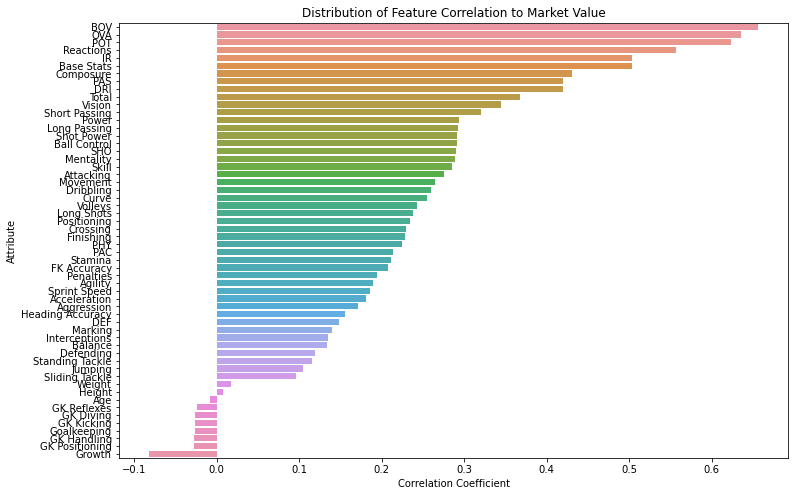

In [11]:
plt.figure(figsize = (12, 8))
sns.barplot(y = sort_corr.index.drop('Value'), x = sort_corr.drop('Value')['Value'])
plt.title('Distribution of Feature Correlation to Market Value')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Attribute')
plt.savefig('feature_corr_dist(all).png')
#corr[corr_cols].loc['Value']

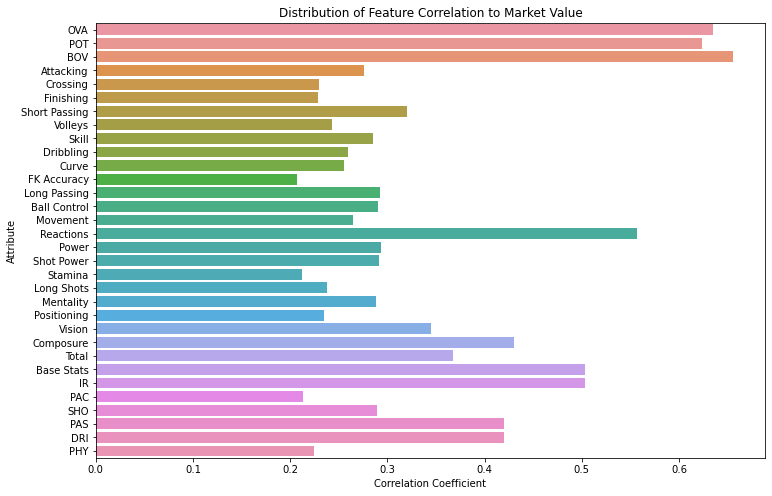

In [12]:
plt.figure(figsize = (12, 8))
sns.barplot(y = above_02.index.drop('Value'), x = above_02.drop('Value')['Value'])
plt.title('Distribution of Feature Correlation to Market Value')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Attribute')
plt.savefig('feature_corr_dist.png')
#corr[corr_cols].loc['Value']

In [13]:
# List of correalted featuers
corr['Value'].sort_values(ascending=False)[1:20].to_frame()

,Value
BOV,0.656070
OVA,0.635025
POT,0.623379
Reactions,0.556528
IR,0.503574
Base Stats,0.503476
Composure,0.430797
PAS,0.419835
DRI,0.419743
Total,0.367699


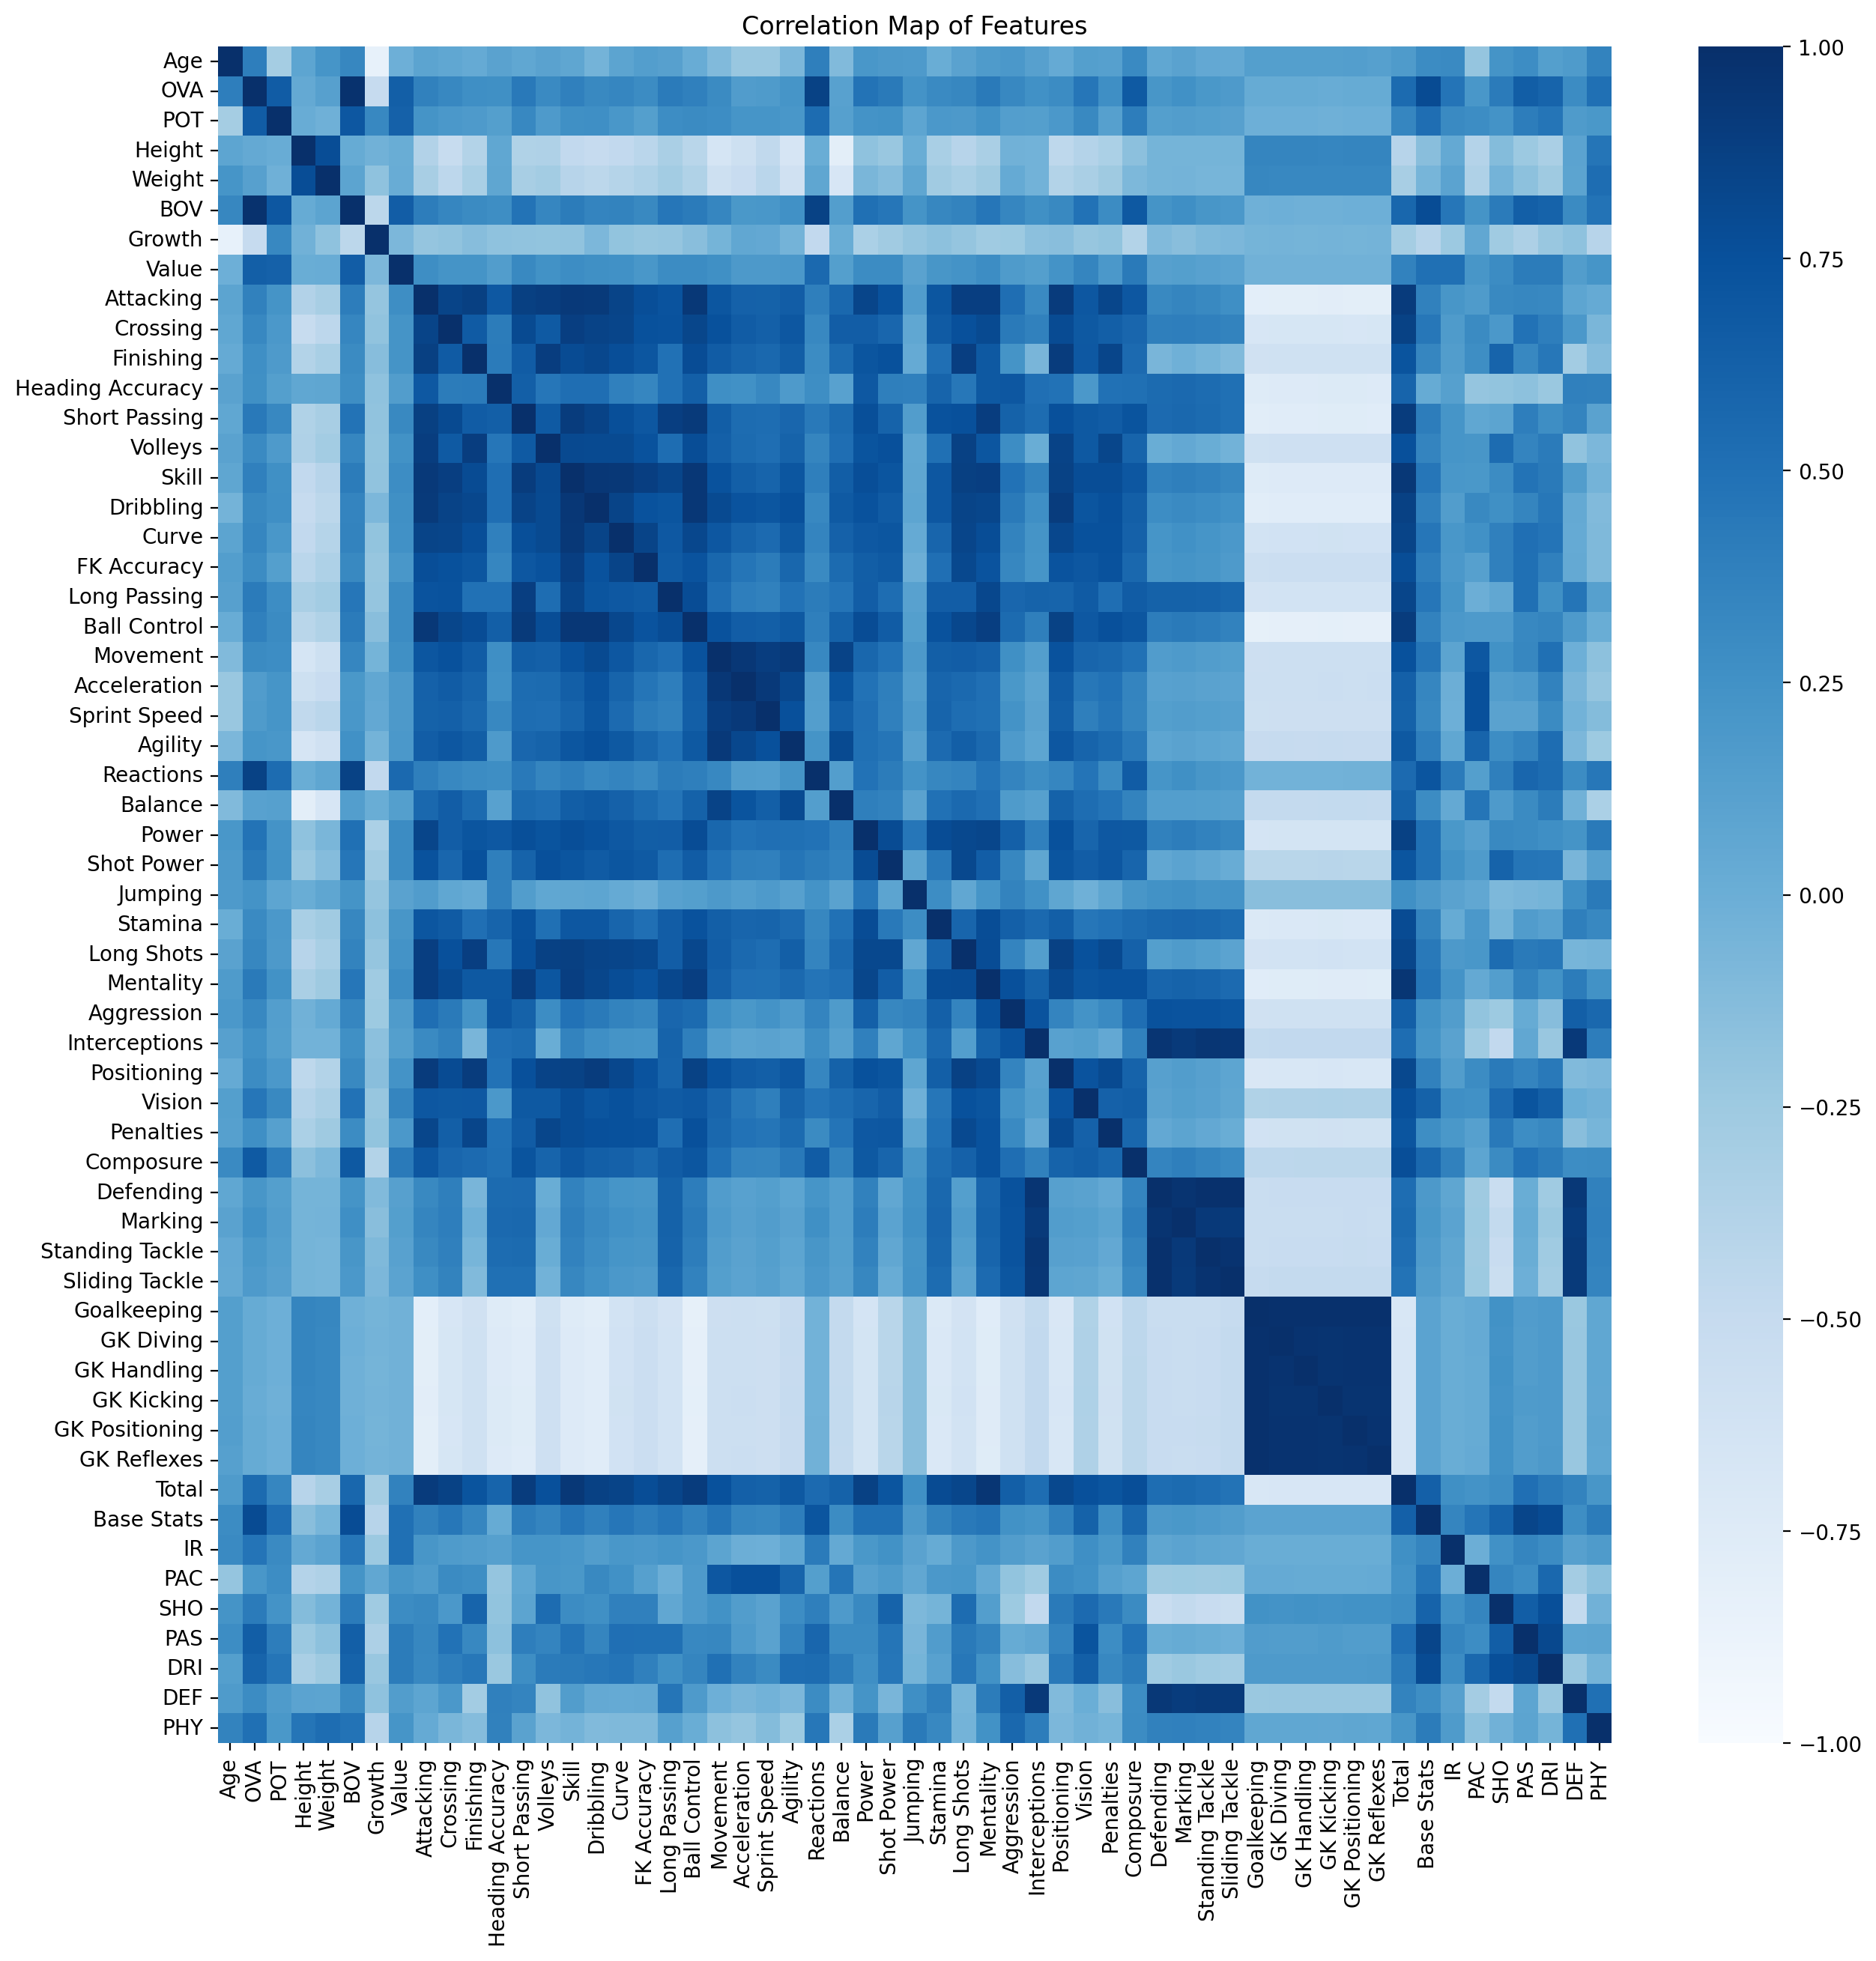

In [14]:
# Heatmap of most correlated features 
plt.figure(figsize=(15,15),dpi=200),
plt.style.use('default')
sns.heatmap(corr, vmin=-1, vmax=1, cmap='Blues');
plt.title('Correlation Map of Features')
plt.savefig('market_value_corr_map.png')
plt.show()

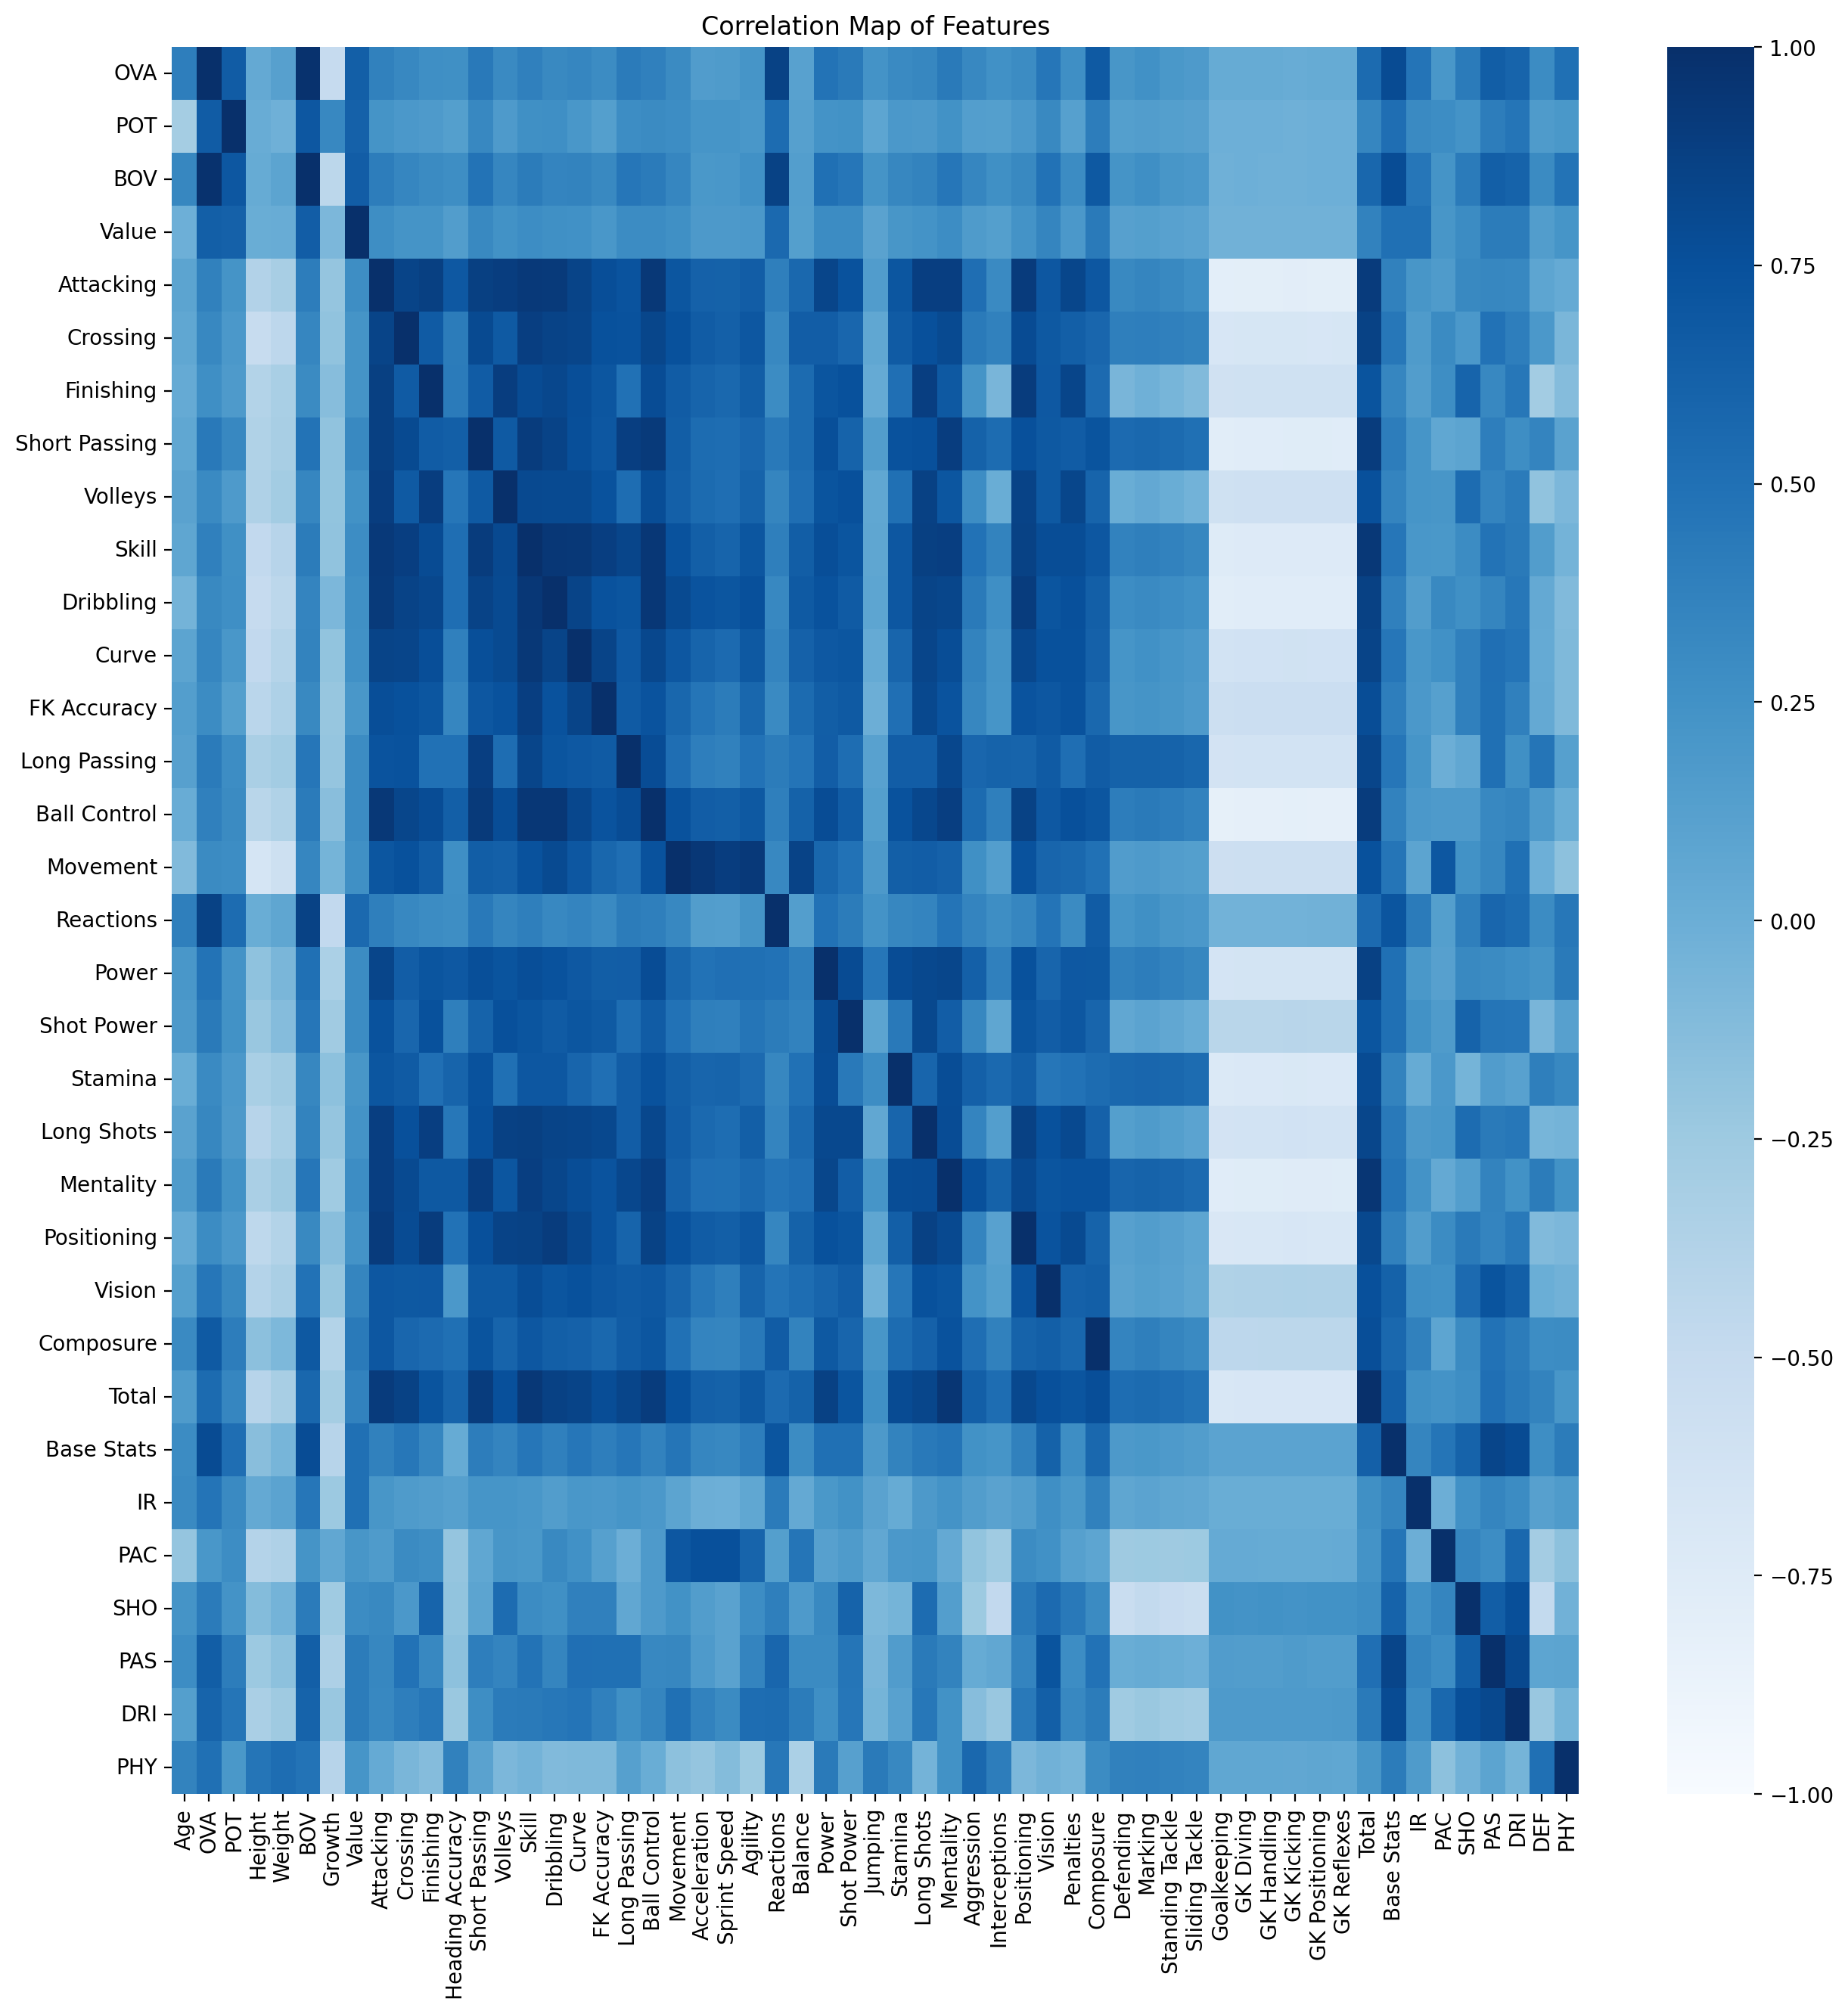

In [40]:
# Heatmap of most correlated features 
plt.figure(figsize=(15,15),dpi=200),
plt.style.use('default')
sns.heatmap(above_02, annot=False, vmin=-1, vmax=1, cmap='Blues');
plt.title('Correlation Map of Features')
plt.savefig('market_value_corr_map(above 0.2).png')
plt.show()

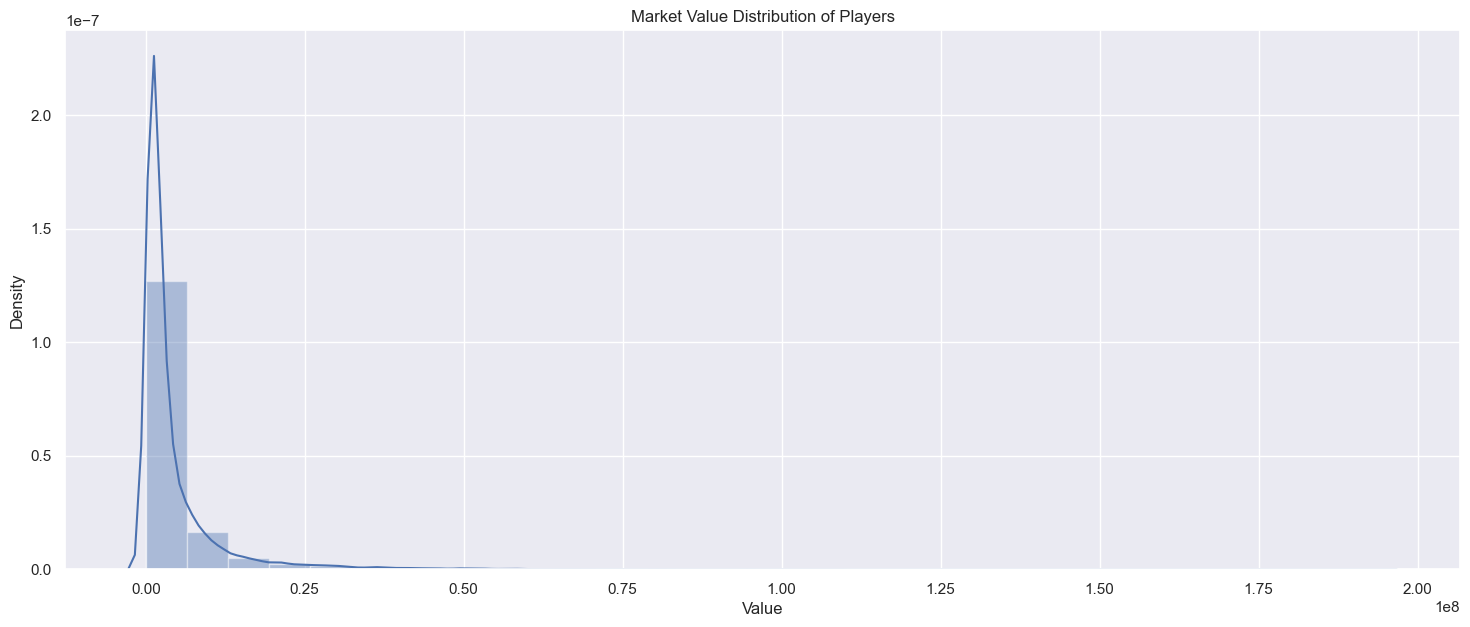

In [8]:
#Value Distribution of All Players
from warnings import filterwarnings
filterwarnings('ignore')
plt.figure(1, figsize=(18, 7))
sns.set(style="darkgrid")
sns.distplot( a = player_data['Value'], bins=30)
plt.title('Market Value Distribution of Players')
plt.show()

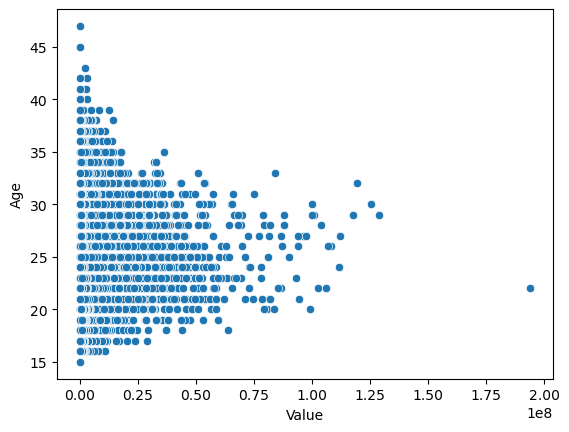

In [75]:
sns.scatterplot(y=player_data['Age'],x= player_data['Value']);


In [67]:
#Top 5 Rating Player
player_data.nlargest(5,columns="BOV")

,Name,Age,OVA,POT,Height,Weight,foot,BOV,BP,Growth,Value,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total,Base Stats,IR,PAC,SHO,PAS,DRI,DEF,PHY,Team,Contract
28709,K. Mbappé ST LW,22,91,95,182,73,Right,92,ST,4,194000000.0,411,78,93,72,85,83.0,404,93,80.0,69,71,91,462,97,97,92.0,93,83.0,411,86,78.0,88,82,353,62,38.0,92.0,82.0,79,88.0,92,26,34,32.0,42,13,5,7,11,6,2175,470,4,97,88,80,92,36,77,Paris Saint-Germain,2018 ~ 2025
28765,R. Lewandowski ST,32,92,92,185,81,Right,92,ST,0,119500000.0,430,71,95,90,85,89.0,407,85,79.0,85,70,88,407,77,78,77.0,93,82.0,424,90,85.0,76,87,396,81,49.0,95.0,81.0,90,88.0,96,35,42,19.0,51,15,6,12,8,10,2211,461,5,78,92,79,86,44,82,FC Bayern München,2014 ~ 2023
28669,K. Benzema CF ST,33,91,91,185,81,Right,91,CF,0,84000000.0,434,75,92,90,89,88.0,409,87,82.0,73,76,91,401,79,80,78.0,92,72.0,409,87,79.0,81,80,367,63,39.0,92.0,89.0,84,90.0,85,43,24,18.0,41,13,11,5,5,7,2146,455,4,80,88,83,87,39,78,Real Madrid CF,2009 ~ 2023
28809,K. De Bruyne CM CAM,30,91,91,181,70,Right,91,CM,0,125500000.0,408,94,83,55,93,83.0,439,88,85.0,83,93,90,400,76,76,79.0,91,78.0,408,92,63.0,88,91,406,75,66.0,88.0,94.0,83,89.0,186,68,65,53.0,56,15,13,5,10,13,2303,484,4,76,87,93,87,64,77,Manchester City,2015 ~ 2025
29096,M. Salah RW,29,91,91,175,71,Left,91,RW,0,129000000.0,402,81,93,59,85,84.0,412,92,84.0,69,77,90,457,90,91,91.0,94,91.0,399,83,69.0,87,85,382,63,55.0,92.0,86.0,86,92.0,122,38,43,41.0,62,14,14,9,11,14,2236,473,4,91,89,82,91,45,75,Liverpool,2017 ~ 2023


In [69]:
player_data['foot'].unique()

array(['Left', 'Right'], dtype=object)

In [11]:
#Top 5 Clup (Mean Value)
pd.DataFrame(player_data.groupby("Team").Value.mean().sort_values(ascending=False).head(5))

,Value
Team,
Manchester City,3.043583e+07
FC Bayern München,2.740037e+07
Liverpool,2.667802e+07
Atlético de Madrid,2.646057e+07
Real Madrid CF,2.581953e+07


In [15]:
# Data segmebntation
X= player_data.drop(columns=["Value","Name","Team","foot","BP","Contract"])
y= player_data.loc[:,"Value"]


# Build model on numerical features
# fit model with target as player market value 
player_model = sm.OLS(y, X, data=player_data)

results = player_model.fit()

print(results.summary())

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.671
Model:                            OLS   Adj. R-squared (uncentered):              0.670
Method:                 Least Squares   F-statistic:                              1651.
Date:                Mon, 05 Sep 2022   Prob (F-statistic):                        0.00
Time:                        08:30:04   Log-Likelihood:                     -6.4277e+05
No. Observations:               38187   AIC:                                  1.286e+06
Df Residuals:                   38140   BIC:                                  1.286e+06
Df Model:                          47                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [16]:
#Some EDA
#Top 5 Valuable Player
player_data.nlargest(5,columns="Value")

,Name,Age,OVA,POT,Height,Weight,foot,BOV,BP,Growth,Value,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total,Base Stats,IR,PAC,SHO,PAS,DRI,DEF,PHY,Team,Contract
28709,K. Mbappé ST LW,22,91,95,182,73,Right,92,ST,4,194000000.0,411,78,93,72,85,83.0,404,93,80.0,69,71,91,462,97,97,92.0,93,83.0,411,86,78.0,88,82,353,62,38.0,92.0,82.0,79,88.0,92,26,34,32.0,42,13,5,7,11,6,2175,470,4,97,88,80,92,36,77,Paris Saint-Germain,2018 ~ 2025
29096,M. Salah RW,29,91,91,175,71,Left,91,RW,0,129000000.0,402,81,93,59,85,84.0,412,92,84.0,69,77,90,457,90,91,91.0,94,91.0,399,83,69.0,87,85,382,63,55.0,92.0,86.0,86,92.0,122,38,43,41.0,62,14,14,9,11,14,2236,473,4,91,89,82,91,45,75,Liverpool,2017 ~ 2023
28809,K. De Bruyne CM CAM,30,91,91,181,70,Right,91,CM,0,125500000.0,408,94,83,55,93,83.0,439,88,85.0,83,93,90,400,76,76,79.0,91,78.0,408,92,63.0,88,91,406,75,66.0,88.0,94.0,83,89.0,186,68,65,53.0,56,15,13,5,10,13,2303,484,4,76,87,93,87,64,77,Manchester City,2015 ~ 2025
28765,R. Lewandowski ST,32,92,92,185,81,Right,92,ST,0,119500000.0,430,71,95,90,85,89.0,407,85,79.0,85,70,88,407,77,78,77.0,93,82.0,424,90,85.0,76,87,396,81,49.0,95.0,81.0,90,88.0,96,35,42,19.0,51,15,6,12,8,10,2211,461,5,78,92,79,86,44,82,FC Bayern München,2014 ~ 2023
28619,Neymar Jr LW CAM,29,90,90,175,68,Right,90,LW,0,117500000.0,403,85,83,63,86,86.0,446,95,88.0,87,81,95,447,91,88,95.0,89,84.0,358,79,64.0,81,81,367,63,37.0,86.0,90.0,91,93.0,96,35,32,29.0,59,9,9,15,15,11,2176,452,5,89,83,86,94,37,63,Paris Saint-Germain,2017 ~ 2025


In [17]:
#Grab the top most correlated 20 fetues
top_20 = corr['Value'].abs().sort_values(ascending=False)[1:][:20]
top_20

BOV              0.656070
OVA              0.635025
POT              0.623379
Reactions        0.556528
IR               0.503574
Base Stats       0.503476
Composure        0.430797
PAS              0.419835
DRI              0.419743
Total            0.367699
Vision           0.345151
Short Passing    0.319782
Power            0.293143
Long Passing     0.292718
Shot Power       0.291220
Ball Control     0.290755
SHO              0.289754
Mentality        0.288276
Skill            0.284897
Attacking        0.276029
Name: Value, dtype: float64

In [18]:
#Model based on most correlated 20 Features

X1 = player_data[top_20.index]
y1= player_data.loc[:,"Value"]

player_model1 = sm.OLS(y1, X1, data=player_data)

results1 = player_model1.fit()

print(results1.summary());

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.462
Model:                            OLS   Adj. R-squared (uncentered):              0.462
Method:                 Least Squares   F-statistic:                              1642.
Date:                Mon, 05 Sep 2022   Prob (F-statistic):                        0.00
Time:                        08:30:05   Log-Likelihood:                     -6.5211e+05
No. Observations:               38187   AIC:                                  1.304e+06
Df Residuals:                   38167   BIC:                                  1.304e+06
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


In [19]:
#Creating Position Group based on BP (Best Position)

player_data["BP"] = player_data["BP"].str.strip()

keeper = ["GK"]

defence = ["RB","RCB","CB","LCB","LB","RWB","LWB"]

midfield = ["RDM","CDM","LDM","RM","RCM","CM","LCM","LM","LAM","CAM","RAM"]

forward = ["RW","RF","CF","LF","LW","LS","ST","RS"]

def classify_position(pos):

    if pos in defence:
        return ("defence")
    elif pos in midfield:
        return ("midfield")
    elif pos in forward:
        return ("forward")
    else:
        return ("keeper")
    
player_data["Line_of_Play"] = player_data["BP"].apply(lambda val:classify_position(val))

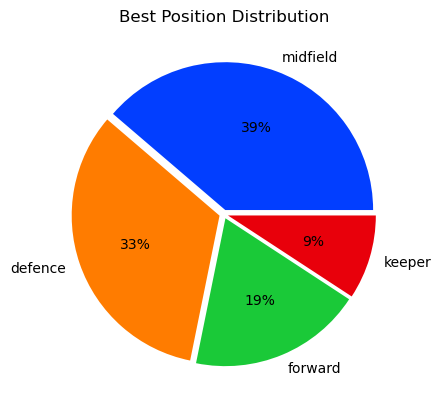

In [20]:
piedata = player_data['Line_of_Play'].value_counts()
palette_color = sns.color_palette('bright')

plt.pie(piedata.values, labels=piedata.index, colors=palette_color, autopct='%.0f%%', explode=[0.03,0.03,0.03,0.03]);
plt.title('Best Position Distribution')
plt.savefig('BP_piechart')

In [21]:
by_lin_of_play = player_data.groupby('Line_of_Play')

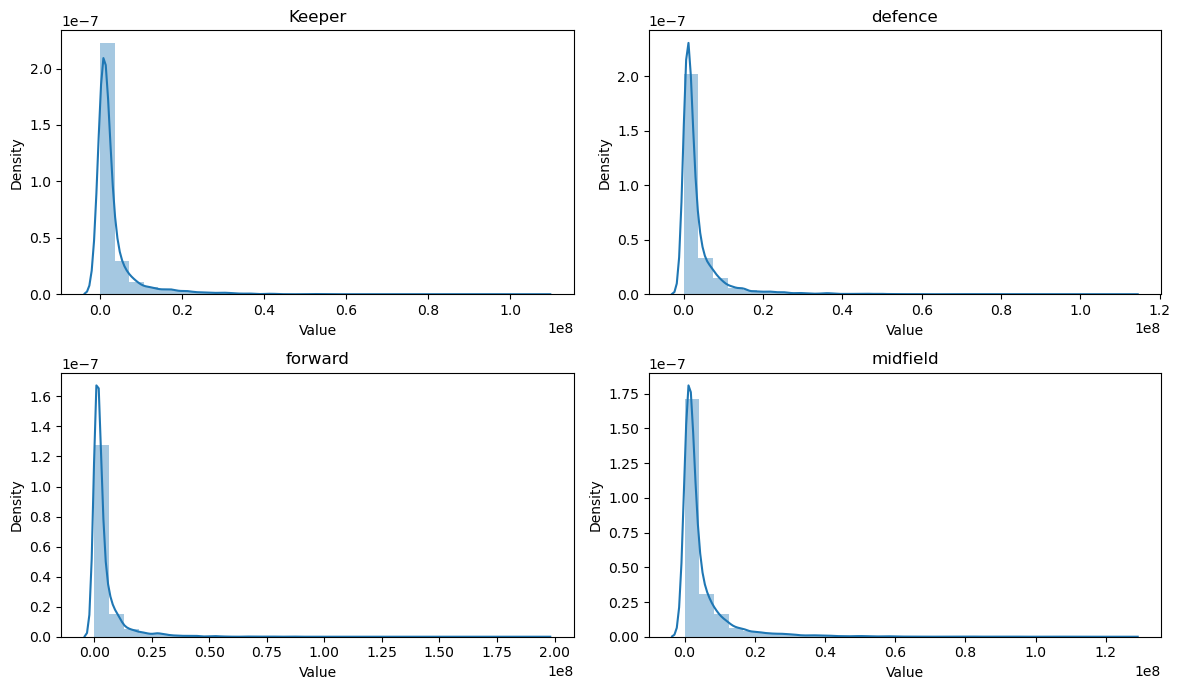

In [22]:
['keeper', 'defence', 'forward', 'midfied']
from warnings import filterwarnings
filterwarnings('ignore')
fig, ax = plt.subplots(2, 2, figsize=(12, 7));
sns.distplot(by_lin_of_play.get_group('keeper')['Value'], bins= 30, ax=ax[0, 0])
ax[0, 0].set_title('Keeper')


sns.distplot(by_lin_of_play.get_group('defence')['Value'], bins= 30, ax=ax[0, 1])
ax[0, 1].set_title('defence')

sns.distplot(by_lin_of_play.get_group('forward')['Value'], bins= 30, ax=ax[1, 0])
ax[1, 0].set_title('forward')

sns.distplot(by_lin_of_play.get_group('midfield')['Value'], bins= 30, ax=ax[1, 1]);
ax[1, 1].set_title('midfield')
plt.tight_layout();

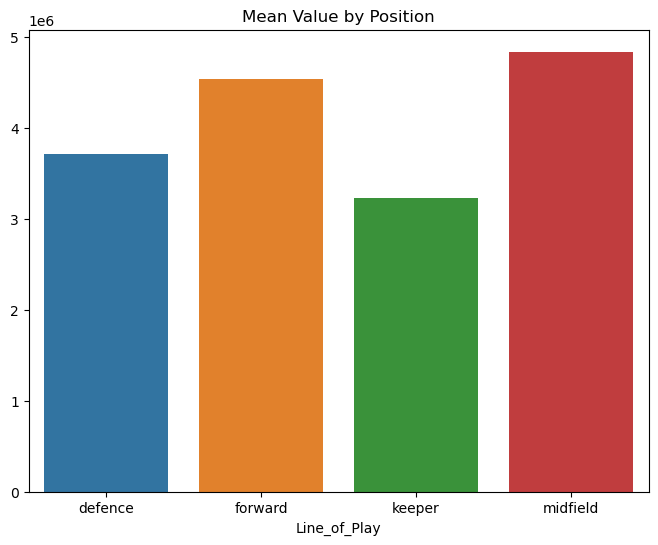

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(by_lin_of_play.mean()['Value'].index, by_lin_of_play.mean()['Value'].values)
plt.title('Mean Value by Position');

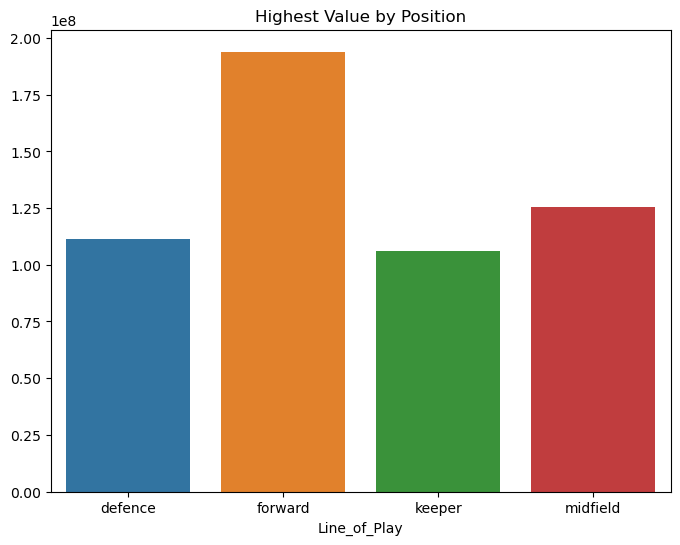

In [24]:
plt.figure(figsize=(8,6))
sns.barplot(by_lin_of_play.max()['Value'].index, by_lin_of_play.max()['Value'].values)
plt.title('Highest Value by Position');

In [25]:
#Creating Dummy Variables for Position_Gr
dummied_data = pd.concat([player_data.drop('Line_of_Play', axis=1), pd.get_dummies(player_data['Line_of_Play'])], axis=1)

In [26]:
dummied_data.head()

,Name,Age,OVA,POT,Height,Weight,foot,BOV,BP,Growth,Value,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,...,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total,Base Stats,IR,PAC,SHO,PAS,DRI,DEF,PHY,Team,Contract,defence,forward,keeper,midfield
0,Bernardo Silva CAM CM RW,23,86,91,173,64,Left,86,CAM,5,59500000.0,366,85,76,51,85,69.0,412,92,83.0,67,79,91,426,86,78,92.0,82,88.0,331,70,50.0,...,352,66,49.0,83.0,86.0,68,86.0,148,49,59,40.0,54,9,10,14,12,9,2089,444,2,82,74,83,91,51,63,Manchester City,2017 ~ 2024,0,0,0,1
1,J. Kimmich RB CM CDM,23,86,88,176,73,Right,83,RB,2,45000000.0,385,91,66,74,87,67.0,390,80,81.0,61,83,85,399,78,68,84.0,86,83.0,381,75,79.0,...,362,79,80.0,80.0,79.0,44,82.0,235,75,81,79.0,60,8,15,7,15,15,2212,460,3,73,68,84,82,78,75,FC Bayern München,2015 ~ 2023,1,0,0,0
2,A. Laporte CB LB,24,86,89,189,85,Left,85,CB,3,47500000.0,308,58,45,86,79,40.0,343,60,61.0,69,78,75,325,62,66,56.0,86,55.0,346,68,76.0,...,322,78,87.0,54.0,59.0,44,84.0,265,88,89,88.0,45,10,11,5,14,5,1954,415,2,64,50,69,65,88,79,Manchester City,2018 ~ 2024,1,0,0,0
3,Ederson GK,24,86,90,188,86,Left,84,GK,4,41500000.0,122,20,14,14,56,18.0,156,23,15.0,20,58,40,322,64,63,60.0,87,48.0,235,42,66.0,...,172,38,27.0,20.0,70.0,17,70.0,52,29,15,8.0,426,85,80,92,82,87,1485,489,2,85,80,92,87,63,82,Manchester City,2017 ~ 2024,0,0,1,0
4,Roberto Firmino CF ST CAM,26,86,87,181,76,Right,85,CF,1,53000000.0,402,72,86,77,86,81.0,396,88,80.0,65,75,88,402,78,77,80.0,86,81.0,402,81,81.0,...,375,73,58.0,87.0,85.0,72,87.0,166,60,64,42.0,44,8,11,9,6,10,2187,465,3,77,82,80,87,61,78,Liverpool,2015 ~ 2023,0,1,0,0


In [27]:
#Creating Age Group based on Age

def parse_age(age):
    
    if 20 <= age < 25:
        return ("Group1")
    
    elif 25 <= age < 30 :
        return ("Group2")
    
    elif 30 <= age <= 35:
        return ("Group3")
    else:
        return "Group4"
    
        
dummied_data["Age_Group"] = dummied_data["Age"].apply(lambda x:parse_age(x))

In [28]:
dummied_data.head()

,Name,Age,OVA,POT,Height,Weight,foot,BOV,BP,Growth,Value,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total,Base Stats,IR,PAC,SHO,PAS,DRI,DEF,PHY,Team,Contract,defence,forward,keeper,midfield,Age_Group
0,Bernardo Silva CAM CM RW,23,86,91,173,64,Left,86,CAM,5,59500000.0,366,85,76,51,85,69.0,412,92,83.0,67,79,91,426,86,78,92.0,82,88.0,331,70,50.0,...,66,49.0,83.0,86.0,68,86.0,148,49,59,40.0,54,9,10,14,12,9,2089,444,2,82,74,83,91,51,63,Manchester City,2017 ~ 2024,0,0,0,1,Group1
1,J. Kimmich RB CM CDM,23,86,88,176,73,Right,83,RB,2,45000000.0,385,91,66,74,87,67.0,390,80,81.0,61,83,85,399,78,68,84.0,86,83.0,381,75,79.0,...,79,80.0,80.0,79.0,44,82.0,235,75,81,79.0,60,8,15,7,15,15,2212,460,3,73,68,84,82,78,75,FC Bayern München,2015 ~ 2023,1,0,0,0,Group1
2,A. Laporte CB LB,24,86,89,189,85,Left,85,CB,3,47500000.0,308,58,45,86,79,40.0,343,60,61.0,69,78,75,325,62,66,56.0,86,55.0,346,68,76.0,...,78,87.0,54.0,59.0,44,84.0,265,88,89,88.0,45,10,11,5,14,5,1954,415,2,64,50,69,65,88,79,Manchester City,2018 ~ 2024,1,0,0,0,Group1
3,Ederson GK,24,86,90,188,86,Left,84,GK,4,41500000.0,122,20,14,14,56,18.0,156,23,15.0,20,58,40,322,64,63,60.0,87,48.0,235,42,66.0,...,38,27.0,20.0,70.0,17,70.0,52,29,15,8.0,426,85,80,92,82,87,1485,489,2,85,80,92,87,63,82,Manchester City,2017 ~ 2024,0,0,1,0,Group1
4,Roberto Firmino CF ST CAM,26,86,87,181,76,Right,85,CF,1,53000000.0,402,72,86,77,86,81.0,396,88,80.0,65,75,88,402,78,77,80.0,86,81.0,402,81,81.0,...,73,58.0,87.0,85.0,72,87.0,166,60,64,42.0,44,8,11,9,6,10,2187,465,3,77,82,80,87,61,78,Liverpool,2015 ~ 2023,0,1,0,0,Group2


In [29]:
#Creating Dummy Variables for Age_Gr
dummied_data2 = pd.concat([dummied_data.drop(['Age_Group'], axis=1), pd.get_dummies(dummied_data['Age_Group'])], axis=1);

In [30]:
dummied_data2.head()

,Name,Age,OVA,POT,Height,Weight,foot,BOV,BP,Growth,Value,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,...,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total,Base Stats,IR,PAC,SHO,PAS,DRI,DEF,PHY,Team,Contract,defence,forward,keeper,midfield,Group1,Group2,Group3,Group4
0,Bernardo Silva CAM CM RW,23,86,91,173,64,Left,86,CAM,5,59500000.0,366,85,76,51,85,69.0,412,92,83.0,67,79,91,426,86,78,92.0,82,88.0,331,70,50.0,...,86.0,68,86.0,148,49,59,40.0,54,9,10,14,12,9,2089,444,2,82,74,83,91,51,63,Manchester City,2017 ~ 2024,0,0,0,1,1,0,0,0
1,J. Kimmich RB CM CDM,23,86,88,176,73,Right,83,RB,2,45000000.0,385,91,66,74,87,67.0,390,80,81.0,61,83,85,399,78,68,84.0,86,83.0,381,75,79.0,...,79.0,44,82.0,235,75,81,79.0,60,8,15,7,15,15,2212,460,3,73,68,84,82,78,75,FC Bayern München,2015 ~ 2023,1,0,0,0,1,0,0,0
2,A. Laporte CB LB,24,86,89,189,85,Left,85,CB,3,47500000.0,308,58,45,86,79,40.0,343,60,61.0,69,78,75,325,62,66,56.0,86,55.0,346,68,76.0,...,59.0,44,84.0,265,88,89,88.0,45,10,11,5,14,5,1954,415,2,64,50,69,65,88,79,Manchester City,2018 ~ 2024,1,0,0,0,1,0,0,0
3,Ederson GK,24,86,90,188,86,Left,84,GK,4,41500000.0,122,20,14,14,56,18.0,156,23,15.0,20,58,40,322,64,63,60.0,87,48.0,235,42,66.0,...,70.0,17,70.0,52,29,15,8.0,426,85,80,92,82,87,1485,489,2,85,80,92,87,63,82,Manchester City,2017 ~ 2024,0,0,1,0,1,0,0,0
4,Roberto Firmino CF ST CAM,26,86,87,181,76,Right,85,CF,1,53000000.0,402,72,86,77,86,81.0,396,88,80.0,65,75,88,402,78,77,80.0,86,81.0,402,81,81.0,...,85.0,72,87.0,166,60,64,42.0,44,8,11,9,6,10,2187,465,3,77,82,80,87,61,78,Liverpool,2015 ~ 2023,0,1,0,0,0,1,0,0


<AxesSubplot:xlabel='Value', ylabel='Density'>

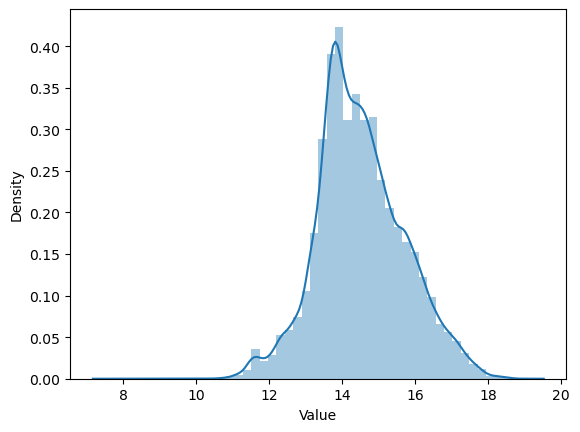

In [31]:
dummied_data2['Value'] = np.log(dummied_data2['Value'])
sns.distplot(dummied_data2['Value'])

In [32]:
# Slice data into faeture and target

X2= dummied_data2.drop(columns=["Value","Name","Team", "Contract","foot","BP"])
y2= dummied_data2.loc[:,"Value"]

# fit model with target as player market value 
player_model2 = sm.OLS(y2, X2, data=dummied_data2)

results2 = player_model2.fit()

print(results2.summary())


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 1.382e+04
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        08:30:10   Log-Likelihood:                -3571.1
No. Observations:               38187   AIC:                             7250.
Df Residuals:                   38133   BIC:                             7712.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                 -0.1137      0.001  

In [33]:
# Slice data into faeture and target

X3= dummied_data2.drop(columns=["Value","Name","Team", "Contract","foot","BP",'Volleys',
                                'Skill','FK Accuracy', 'Acceleration', 'Balance', 'Power', 'PAC'])
y3= dummied_data2["Value"]

# fit model with target as player market value 
player_model3 = sm.OLS(y3, X3, data=dummied_data2)

results3 = player_model3.fit()

print(results3.summary())


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 1.435e+04
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        08:30:10   Log-Likelihood:                -3576.0
No. Observations:               38187   AIC:                             7256.
Df Residuals:                   38135   BIC:                             7701.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                 -0.1136      0.001  

In [34]:
data2 = dummied_data2.drop('Value', axis=1)

In [32]:
X2.shape

(38187, 64)

In [77]:
X4= dummied_data2.loc[:,["Age","defence","midfield","forward","IR","OVA","POT","Reactions",
               "Base Stats","Mentality","Goalkeeping","Growth","BOV"]]

y4= dummied_data2.loc[:,"Value"]

# fit model with target as player market value 
player_model4 = sm.OLS(y4, X4, data=dummied_data2)

results4 = player_model4.fit()

print(results4.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.370e+06
Date:                Mon, 05 Sep 2022   Prob (F-statistic):                        0.00
Time:                        08:33:24   Log-Likelihood:                         -8497.2
No. Observations:               38187   AIC:                                  1.702e+04
Df Residuals:                   38175   BIC:                                  1.712e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [34]:
scaler = MinMaxScaler()
X4[["OVA","POT","Reactions","Base Stats","Movement","Mentality","Goalkeeping"]]=scaler.fit_transform(X4[["OVA","POT","Reactions","Base Stats","Movement","Mentality","Goalkeeping"]])

In [35]:
X5= X4.loc[:,["Age","OVA","POT","IR","Reactions","Base Stats","Movement"
              ,"defence","midfield","forward"]]

y5= dummied_data2.loc[:,"Value"]

# fit model with target as player market value 
player_model5 = sm.OLS(y5, X5, data=dummied_data2)

results5 = player_model5.fit()

print(results5.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.082e+06
Date:                Sun, 04 Sep 2022   Prob (F-statistic):                        0.00
Time:                        10:37:19   Log-Likelihood:                         -48548.
No. Observations:               38187   AIC:                                  9.712e+04
Df Residuals:                   38177   BIC:                                  9.720e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [36]:
data1 = dummied_data2.loc[:,["Age","defence","midfield","forward","IR","OVA","POT","Reactions",
               "Base Stats","Movement","Mentality","Goalkeeping","Value"]]

In [37]:
data3 = dummied_data2.drop(["Value","Name","Team", "Contract","foot","BP",'Volleys',
                                'Skill','FK Accuracy', 'Acceleration', 'Balance', 'Power', 'PAC'], axis=1)
data3.shape

(38187, 57)

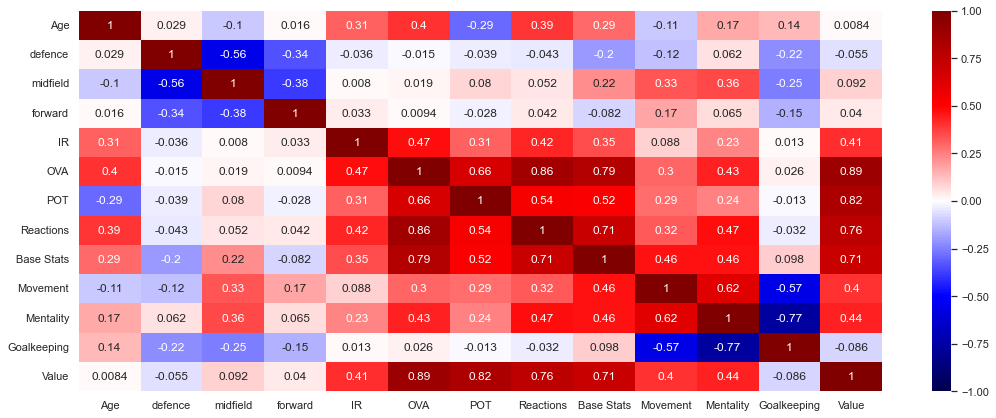

In [38]:
plt.figure(1, figsize=(18, 7))
sns.set(style="whitegrid")
sns.heatmap(data1.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

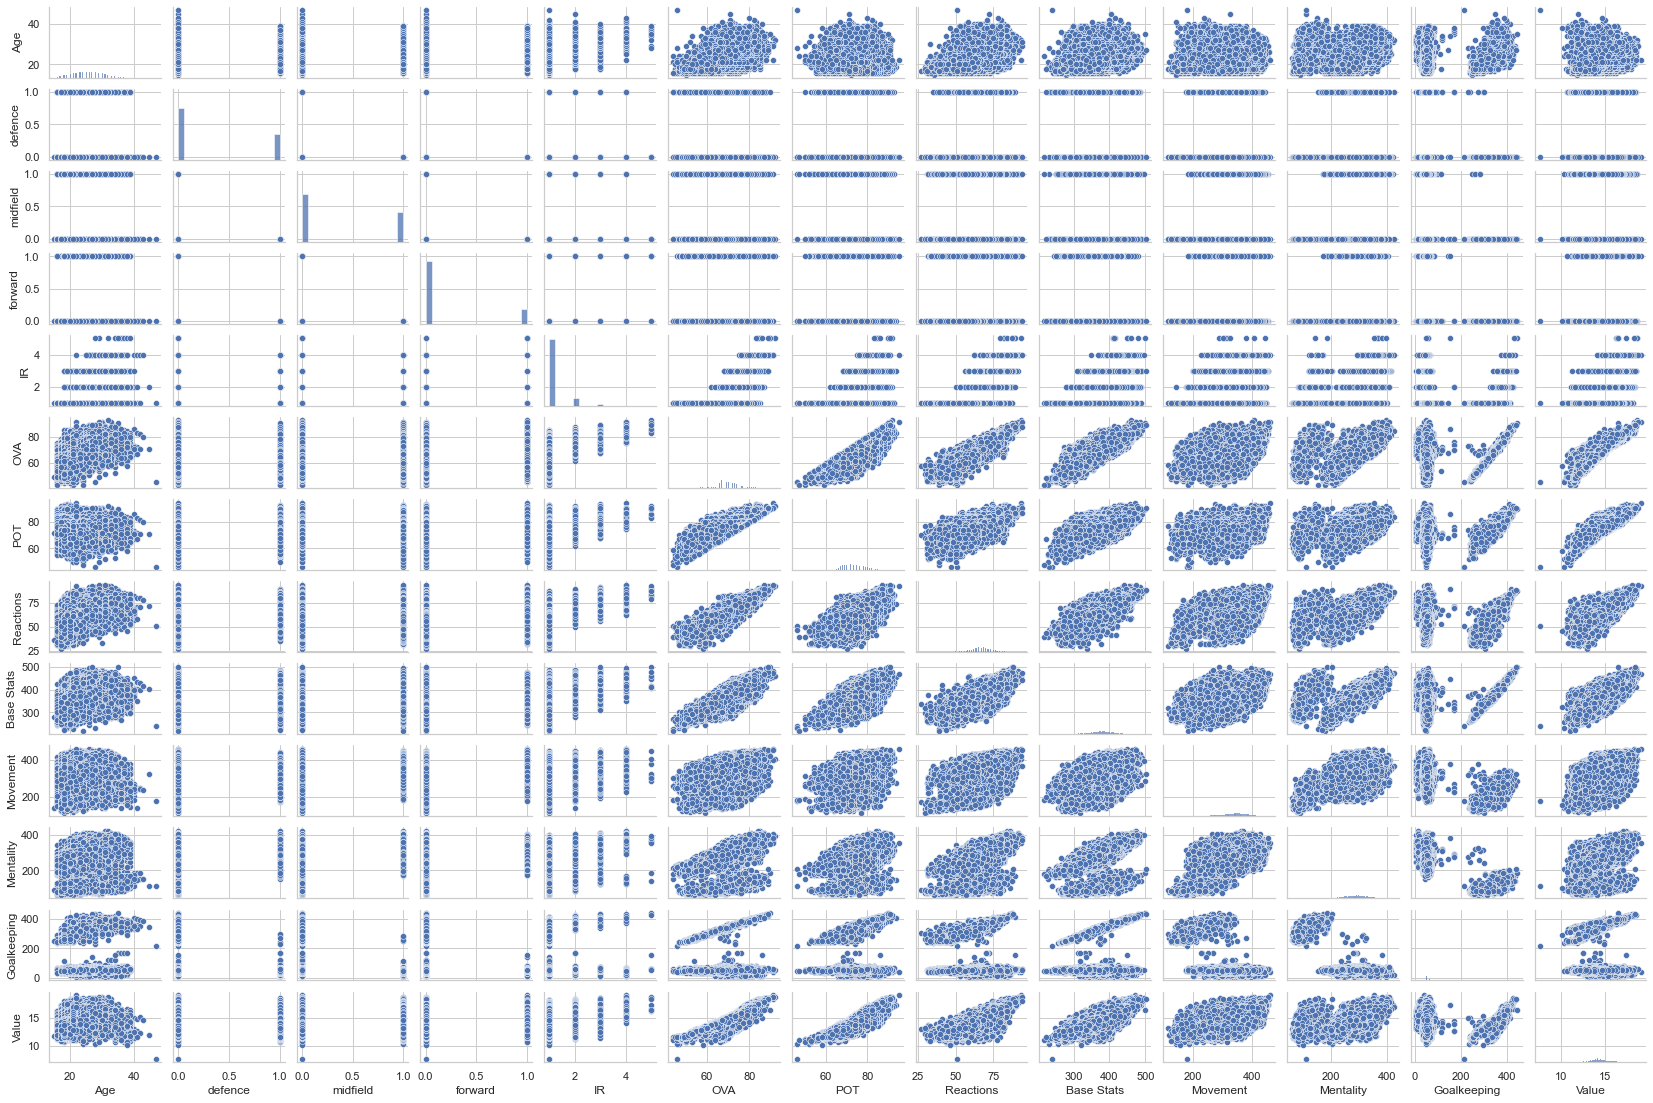

In [39]:
sns.pairplot(data1, height=1.2, aspect=1.5);

#### Data Segmentation

In [36]:
from sklearn.model_selection import train_test_split

X =  dummied_data2.drop(['Volleys','Skill','FK Accuracy', 'Acceleration', 'Balance', 'Power', 'PAC',
                            'Value','Name', 'Team','Contract', 'Value','foot','BP'], axis=1)
y = dummied_data2['Value']

# Training and Test set

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=45, test_size=0.25)

In [37]:
preds = {}

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28640, 57), (9547, 57), (28640,), (9547,))

### Building Regression Model (with all Features)



In [40]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)

In [41]:
%%time
linear_model = LinearRegression()
linear_model.fit(scaled_train, y_train)

CPU times: total: 125 ms
Wall time: 80 ms


LinearRegression()

In [42]:
pd.DataFrame(np.abs(linear_model.coef_), X_train.columns).sort_values(0, ascending=False).head()

,0
Group2,3.485991e+10
Group1,3.424912e+10
Group3,2.879097e+10
OVA,2.591685e+10
Mentality,2.444975e+10


In [43]:
%%time
preds['lin'] = linear_model.predict(scaled_test)

CPU times: total: 15.6 ms
Wall time: 8.01 ms


In [44]:
from sklearn.metrics import r2_score ,mean_squared_error, mean_absolute_error


print("R2 Score:",r2_score(y_test, preds['lin']))
# mean squared error
print("RMSE:",np.sqrt(mean_squared_error(np.exp(y_test), np.exp(preds['lin']))))
# mean absolute error
print("MAE:",mean_absolute_error(np.exp(y_test), np.exp(preds['lin'])))

R2 Score: 0.9504263947177506
RMSE: 2580393.9918764145
MAE: 865782.9092842649


#### Building CatBoost Model

In [45]:
from catboost import CatBoostRegressor

In [46]:
%%time
cat = CatBoostRegressor(random_seed=25, iterations=1000, learning_rate=0.1)
cat.fit(X_train.values,y_train.values,verbose=200)

0:	learn: 1.0901198	total: 152ms	remaining: 2m 31s
200:	learn: 0.1521273	total: 2.9s	remaining: 11.5s
400:	learn: 0.1406839	total: 5.52s	remaining: 8.24s
600:	learn: 0.1331321	total: 8.08s	remaining: 5.37s
800:	learn: 0.1267648	total: 10.7s	remaining: 2.66s
999:	learn: 0.1217646	total: 13.2s	remaining: 0us
CPU times: total: 47.9 s
Wall time: 14.2 s


In [47]:
%%time
preds['cat'] = cat.predict(X_test)

CPU times: total: 31.2 ms
Wall time: 24 ms


In [48]:
print("R2 Score:",r2_score(y_test, preds['cat']))
# mean squared error
print("RMSE:",np.sqrt(mean_squared_error(np.exp(y_test), np.exp(preds['cat']))))
# mean absolute error
print("MAE:",mean_absolute_error(np.exp(y_test), np.exp(preds['cat'])))

R2 Score: 0.9835184704861467
RMSE: 1764762.4773538134
MAE: 546639.5911252653


## LightGBM

In [49]:
from lightgbm import LGBMRegressor

In [50]:
%%time
light = LGBMRegressor(random_state=45, learning_rate=0.1)
light.fit(X_train.values,y_train.values)

CPU times: total: 2.78 s
Wall time: 889 ms


LGBMRegressor(random_state=45)

In [51]:
light.feature_importances_

array([426, 385, 304,  15,  16, 282, 154,  33,  55, 101,  28,  38,  41,
        13,  50,  32,  35,  40,  21,  29,  74,  27,  39,  18,  33,  37,
        31,  50,  22,  25,  22,  56,  24,  15,  29,  29,  19,  29,  14,
        24,  19,  48,  41,   5,  24,  17,  14,  51,  10,  18,   8,   0,
         3,  17,   1,   0,   9])

In [52]:
%%time
preds['light'] = light.predict(X_test.values)

CPU times: total: 62.5 ms
Wall time: 26.7 ms


In [53]:
print("R2 Score:",r2_score(y_test, preds['light']))
      
# mean squared error
print("RMSE:", np.sqrt(mean_squared_error(np.exp(y_test), np.exp(preds['light']))))
      
# mean absolute error
print("MAE:", mean_absolute_error(np.exp(y_test), np.exp(preds['light'])))

R2 Score: 0.9827280317839174
RMSE: 1695327.0078993212
MAE: 551852.9834840306


## XGBoost

In [54]:
from xgboost import XGBRegressor

In [55]:
%%time
xgb = XGBRegressor(learning_rate=0.1)
xgb.fit(X_train.values,y_train.values)

CPU times: total: 19.2 s
Wall time: 5 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [56]:
%%time
preds['xgb'] = xgb.predict(X_test.values)

CPU times: total: 109 ms
Wall time: 48 ms


In [57]:
print("R2 Score:",r2_score(y_test, preds['xgb']))
# mean squared error
print("RMSE:",np.sqrt(mean_squared_error(np.exp(y_test), np.exp(preds['xgb']))))
# mean absolute error
print("MAE:",mean_absolute_error(np.exp(y_test), np.exp(preds['xgb'])))

R2 Score: 0.9824784383990045
RMSE: 1797971.535378316
MAE: 562857.1235049294


In [58]:
scores = {'Linear Regression':r2_score(y_test, preds['lin']), 
         'XGBoost': r2_score(y_test, preds['xgb']),
         'LightGBM': r2_score(y_test, preds['light']),
         'CatBoost': r2_score(y_test, preds['cat'])
         }

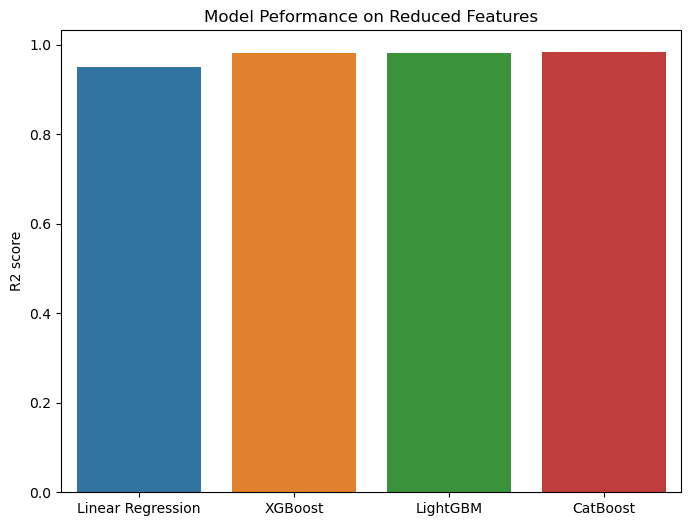

In [59]:
plt.figure(figsize=(8,6))
sns.barplot(list(scores.keys()), list(scores.values()))
plt.ylabel('R2 score')
plt.title('Model Peformance on Reduced Features')
plt.savefig('r2 score(reduced.png')

### Building Model on Selected Features

In [78]:
X_2 =dummied_data2.loc[:,["Age","BOV","defence","midfield","forward","IR","OVA","POT","Reactions",
               "Base Stats","Mentality","Goalkeeping"]]
y_2 = dummied_data2['Value']

# Training and Test set
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2,y_2, random_state=45, test_size=0.25)


In [79]:
preds = {}

##### Linear Regression

In [80]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(X_train2)
scaled_test = scaler.transform(X_test2)

In [81]:
%%time
inear_model = LinearRegression()
linear_model.fit(scaled_train, y_train)

CPU times: total: 31.2 ms
Wall time: 16 ms


LinearRegression()

In [82]:
%%time
preds['lin'] = linear_model.predict(scaled_test)

CPU times: total: 0 ns
Wall time: 0 ns


In [83]:
print("R2 Score:",r2_score(y_test, preds['lin']))
# mean squared error
print("RMSE:",np.sqrt(mean_squared_error(np.exp(y_test), np.exp(preds['lin']))))
# mean absolute error
print("MAE:",mean_absolute_error(np.exp(y_test), np.exp(preds['lin'])))

R2 Score: 0.9413612066782081
RMSE: 2621396.078967262
MAE: 891736.2039795907


#### CatBoost

In [84]:
%%time
cat = CatBoostRegressor(iterations=747, learning_rate=0.1)
cat.fit(X_train2.values,y_train2.values,verbose=200)

0:	learn: 1.0866307	total: 6.87ms	remaining: 5.12s
200:	learn: 0.1584701	total: 1.27s	remaining: 3.46s
400:	learn: 0.1489393	total: 2.5s	remaining: 2.15s
600:	learn: 0.1434212	total: 3.69s	remaining: 896ms
746:	learn: 0.1401957	total: 4.56s	remaining: 0us
CPU times: total: 17 s
Wall time: 5.08 s


In [85]:
%%time
preds['cat'] = cat.predict(X_test2)

CPU times: total: 62.5 ms
Wall time: 24 ms


In [86]:
print("R2 Score:",r2_score(y_test, preds['cat']))
# mean squared error
print("RMSE:",np.sqrt(mean_squared_error(np.exp(y_test), np.exp(preds['cat']))))
# mean absolute error
print("MAE:",mean_absolute_error(np.exp(y_test), np.exp(preds['cat'])))

R2 Score: 0.9824181848139837
RMSE: 1640347.5235690768
MAE: 547277.8557205816


## LightGBM

In [88]:
%%time
from lightgbm import LGBMRegressor
light = LGBMRegressor(random_state=45, learning_rate=0.1)
light.fit(X_train2.values,y_train.values)

CPU times: total: 797 ms
Wall time: 259 ms


LGBMRegressor(random_state=45)

In [89]:
%%time
preds['light'] = light.predict(X_test2.values)

CPU times: total: 172 ms
Wall time: 56 ms


In [90]:
print("R2 Score:",r2_score(y_test, preds['light']))
# mean squared error
print("RMSE:",np.sqrt(mean_squared_error(np.exp(y_test), np.exp(preds['light']))))
# mean absolute error
print("MAE:",mean_absolute_error(np.exp(y_test), np.exp(preds['light'])))

R2 Score: 0.9815936177018677
RMSE: 1715248.4697241122
MAE: 554398.5982764976


## XGBoost

In [91]:
%%time
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.1)
xgb.fit(X_train2.values,y_train2.values)

CPU times: total: 5.94 s
Wall time: 1.65 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [92]:
%%time
preds['xgb'] = xgb.predict(X_test2.values)

CPU times: total: 78.1 ms
Wall time: 28 ms


In [93]:
print("R2 Score:",r2_score(y_test, preds['xgb']))
# mean squared error
print("RMSE:",np.sqrt(mean_squared_error(np.exp(y_test), np.exp(preds['xgb']))))
# mean absolute error
print("MAE:",mean_absolute_error(np.exp(y_test), np.exp(preds['xgb'])))

R2 Score: 0.9814616195861464
RMSE: 1719588.1124363036
MAE: 554737.9462756624


In [94]:
scores = {'Linear Regression':r2_score(y_test, preds['lin']), 
         'XGBoost': r2_score(y_test, preds['xgb']),
         'LightGBM': r2_score(y_test, preds['light']),
         'CatBoost': r2_score(y_test, preds['cat'])
         }

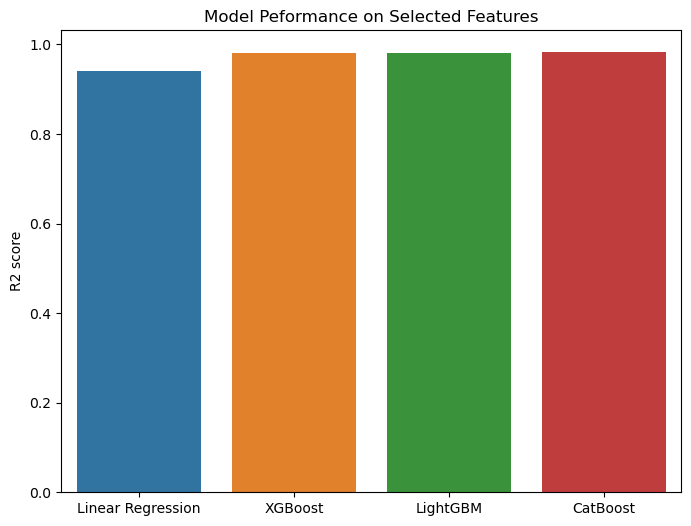

In [95]:
plt.figure(figsize=(8,6))
sns.barplot(list(scores.keys()), list(scores.values()))
plt.ylabel('R2 score')
plt.title('Model Peformance on Selected Features')
plt.savefig('r2 score(selected).png')